In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots as sp
plt.style.use('science')

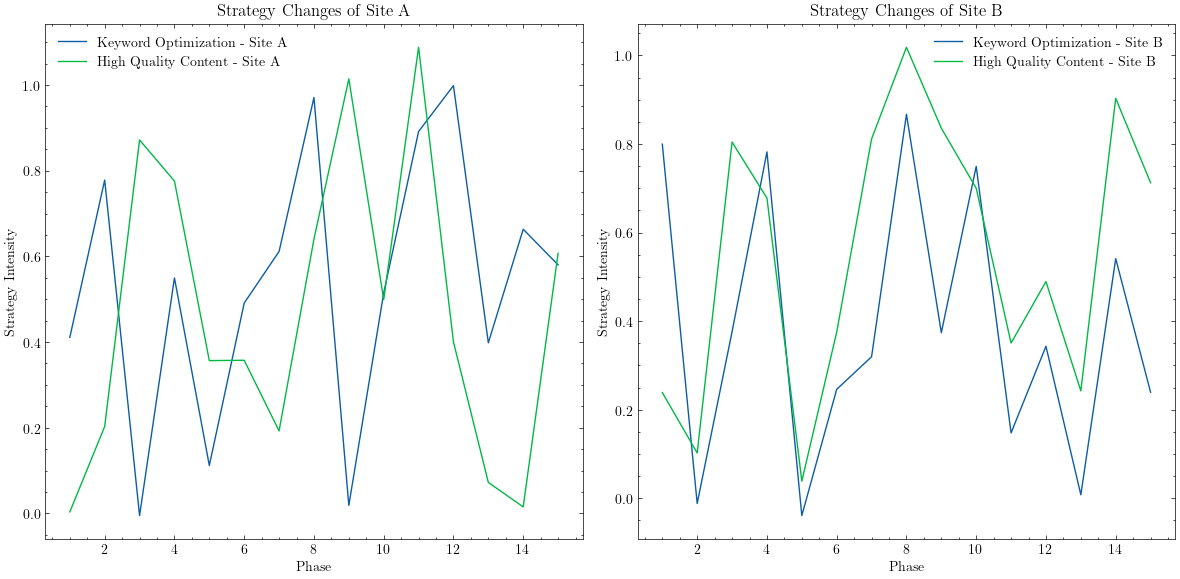

In [22]:

# 参数设置
n_phases = 15  # 阶段数
n_iterations = 10  # 每个阶段的迭代次数
n_sites = 2  # 网站数量
n_strategies = 2  # 策略数量 (关键词优化和高质量内容)
epsilon = 0.1  # 随机性强度
gamma = 1.0  # 策略适应度参数
delta = 1.0  # 策略偏离成本参数
beta = 0.5  # 互动效应参数

# 初始化策略和效用
strategies = np.random.rand(n_phases, n_sites, n_strategies)
utilities = np.zeros((n_phases, n_sites))

# 模拟过程
for phase in range(n_phases):
    for iteration in range(n_iterations):
        for site in range(n_sites):
            # 对手的策略
            opponent_strategy = strategies[phase, 1-site, :]

            # 计算当前策略的效用
            utility = np.log(
                1 + beta * opponent_strategy[0]) - gamma * np.linalg.norm(strategies[phase, site, :] - 0.5)
            utilities[phase, site] = utility

            # 动态策略调整
            strategies[phase, site, :] += epsilon * \
                (np.random.rand(n_strategies) - 0.5)

# 可视化结果
phases = np.arange(1, n_phases + 1)
plt.figure(figsize=(12, 6))

# 绘制网站A的策略变化
plt.subplot(1, 2, 1)
plt.plot(phases, strategies[:, 0, 0], label='Keyword Optimization - Site A')
plt.plot(phases, strategies[:, 0, 1], label='High Quality Content - Site A')
plt.title('Strategy Changes of Site A')
plt.xlabel('Phase')
plt.ylabel('Strategy Intensity')
plt.legend()

# 绘制网站B的策略变化
plt.subplot(1, 2, 2)
plt.plot(phases, strategies[:, 1, 0], label='Keyword Optimization - Site B')
plt.plot(phases, strategies[:, 1, 1], label='High Quality Content - Site B')
plt.title('Strategy Changes of Site B')
plt.xlabel('Phase')
plt.ylabel('Strategy Intensity')
plt.legend()

plt.tight_layout()
plt.show()

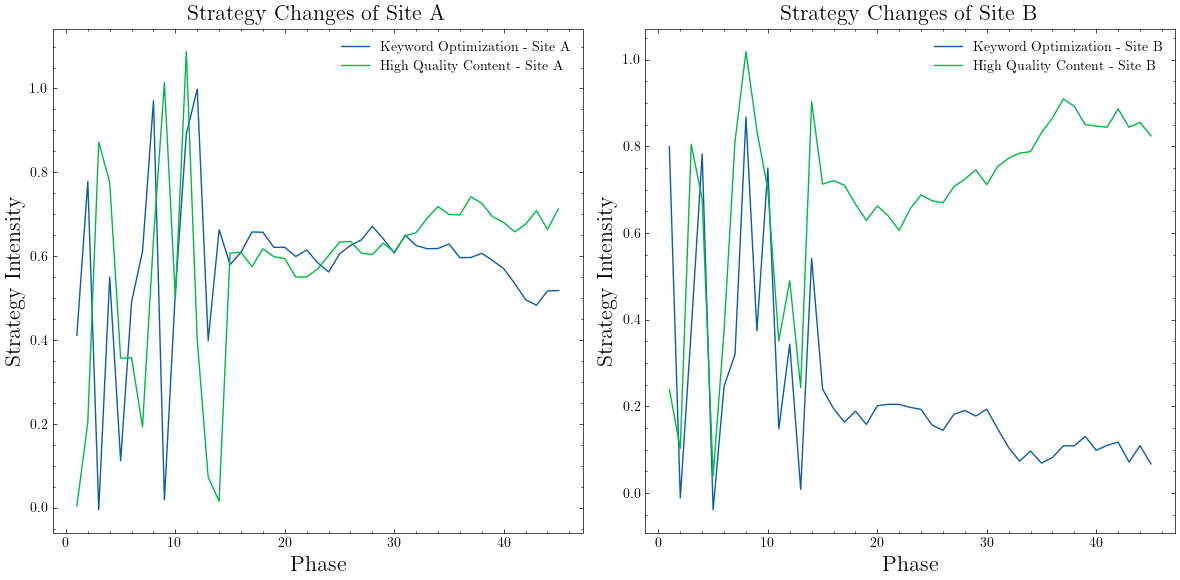

In [23]:
# 假设每个阶段后策略逐渐趋于稳定
# 对每个网站的策略进行额外的迭代，以模拟收敛过程

n_extra_iterations = 30 

# 扩展策略数组以包含额外的迭代
extended_strategies = np.zeros(
    (n_phases + n_extra_iterations, n_sites, n_strategies))
extended_strategies[:n_phases, :, :] = strategies

# 进行额外迭代
for iteration in range(n_phases, n_phases + n_extra_iterations):
    for site in range(n_sites):
        # 对手的策略
        opponent_strategy = extended_strategies[iteration - 1, 1 - site, :]

        # 计算当前策略的效用
        utility = np.log(1 + beta * opponent_strategy[0]) - gamma * np.linalg.norm(
            extended_strategies[iteration, site, :] - 0.5)

        # 动态策略调整
        extended_strategies[iteration, site, :] = extended_strategies[iteration -
                                                                      1, site, :] + epsilon * (np.random.rand(n_strategies) - 0.5)

# Visualize the results (including the convergence process)
extended_phases = np.arange(1, n_phases + n_extra_iterations + 1)
plt.figure(figsize=(12, 6))

# Plot the strategy changes of Site A (including the convergence process)
plt.subplot(1, 2, 1)
plt.plot(extended_phases,
         extended_strategies[:, 0, 0], label='Keyword Optimization - Site A')
plt.plot(extended_phases,
         extended_strategies[:, 0, 1], label='High Quality Content - Site A')
plt.title('Strategy Changes of Site A', fontsize=16)
plt.xlabel('Phase', fontsize=16)
plt.ylabel('Strategy Intensity', fontsize=16)
plt.legend()

# Plot the strategy changes of Site B (including the convergence process)
plt.subplot(1, 2, 2)
plt.plot(extended_phases,
         extended_strategies[:, 1, 0], label='Keyword Optimization - Site B')
plt.plot(extended_phases,
         extended_strategies[:, 1, 1], label='High Quality Content - Site B')
plt.title('Strategy Changes of Site B', fontsize=16)
plt.xlabel('Phase', fontsize=16)
plt.ylabel('Strategy Intensity', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

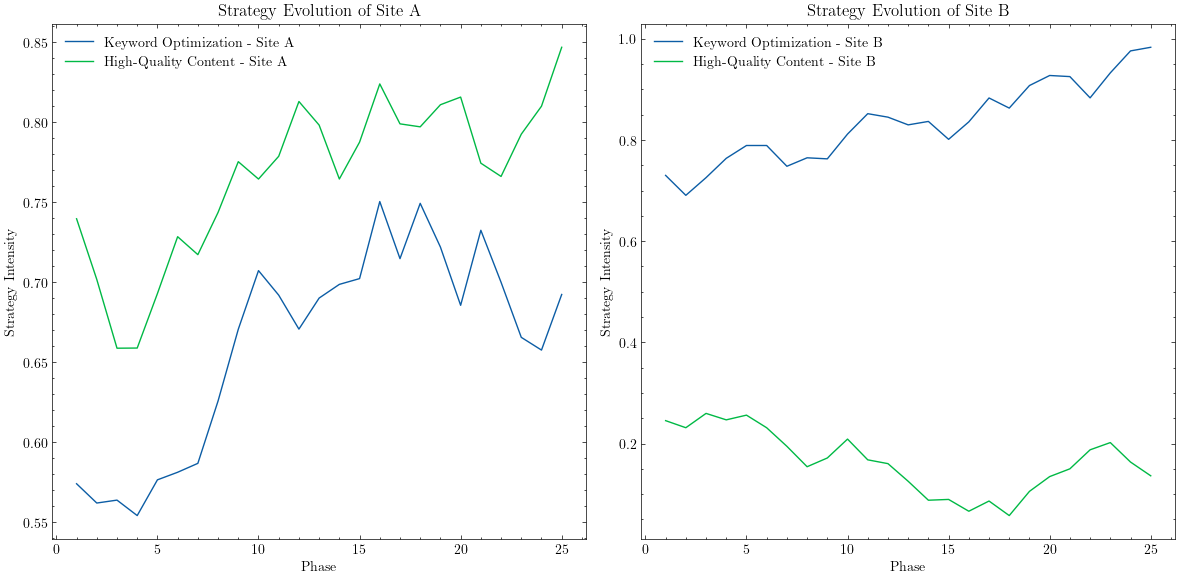

In [24]:


# 参数设置
n_phases = 5  # Number of phases
n_extra_iterations = 20  # Additional iterations for convergence
n_sites = 2  # Number of sites (A and B)
# Number of strategies (Keyword Optimization and High-Quality Content)
n_strategies = 2

# Initialize strategies and utilities
extended_strategies = np.random.rand(
    n_phases + n_extra_iterations, n_sites, n_strategies)

# Simulation parameters
epsilon = 0.1  # Randomness intensity
gamma = 1.0  # Strategy adaptability parameter
delta = 1.0  # Deviation cost parameter
beta = 0.5  # Interaction effect parameter

# Simulation process
for iteration in range(n_phases + n_extra_iterations):
    for site in range(n_sites):
        # Opponent's strategy
        opponent_strategy = extended_strategies[iteration - 1, 1 - site, :]

        # Dynamic strategy adjustment with randomness
        extended_strategies[iteration, site, :] = extended_strategies[iteration -
                                                                      1, site, :] + epsilon * (np.random.rand(n_strategies) - 0.5)

# Visualization
extended_phases = np.arange(1, n_phases + n_extra_iterations + 1)
plt.figure(figsize=(12, 6))

# Site A's strategy over time
plt.subplot(1, 2, 1)
plt.plot(extended_phases,
         extended_strategies[:, 0, 0], label='Keyword Optimization - Site A')
plt.plot(extended_phases,
         extended_strategies[:, 0, 1], label='High-Quality Content - Site A')
plt.title('Strategy Evolution of Site A')
plt.xlabel('Phase')
plt.ylabel('Strategy Intensity')
plt.legend()

# Site B's strategy over time
plt.subplot(1, 2, 2)
plt.plot(extended_phases,
         extended_strategies[:, 1, 0], label='Keyword Optimization - Site B')
plt.plot(extended_phases,
         extended_strategies[:, 1, 1], label='High-Quality Content - Site B')
plt.title('Strategy Evolution of Site B')
plt.xlabel('Phase')
plt.ylabel('Strategy Intensity')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import numpy as np

# 定义数据的大小
n_samples = 1000

# 随机生成SEO策略数据
strategies = np.random.choice(['高关键词密度', '强链接建设', '高质量内容'], n_samples)

# 随机生成排名数据
rankings = np.random.randint(1, 100, n_samples)

# 创建数据框
data = pd.DataFrame({
    'strategy': strategies,
    'ranking': rankings
})

# 保存为CSV文件
data.to_csv('seo_data.csv', index=False)